In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [ ]:
img_path = '../output_videos/player_1.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

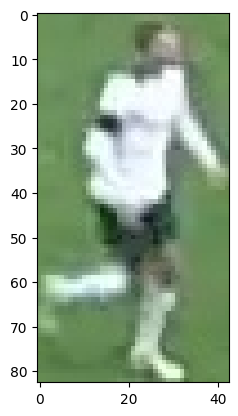

In [3]:
plt.imshow(img)
plt.show()

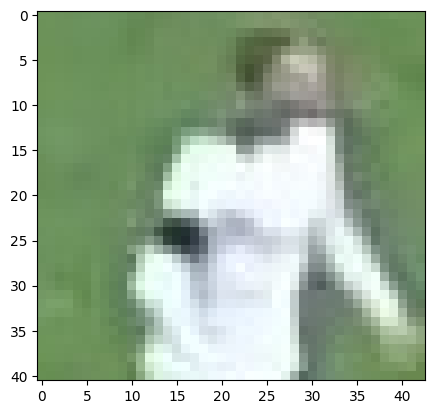

In [4]:
top_half = img[0: int(img.shape[0]/2), :]
plt.imshow(top_half)
plt.show()

In [9]:
top_half.shape

(41, 43, 3)

In [10]:
img_2d = top_half.reshape(-1, 3)
img_2d

array([[109, 147,  90],
       [109, 147,  90],
       [108, 145,  91],
       ...,
       [105, 135,  81],
       [105, 136,  79],
       [105, 136,  79]], shape=(1763, 3), dtype=uint8)

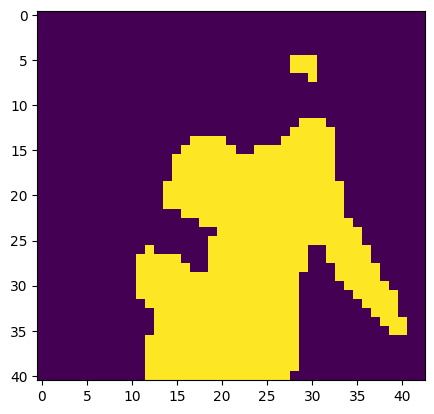

In [16]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(img_2d)

labels = kmeans.labels_

clustered_img = labels.reshape(top_half.shape[0], top_half.shape[1])

plt.imshow(clustered_img)
plt.show()

In [18]:
corners = [clustered_img[0][0], clustered_img[0][-1], clustered_img[-1][0], clustered_img[-1][-1]]
background_label = max(set(corners), key=corners.count)
print(background_label)

0


In [ ]:
player_label = 1 if background_label == 0 else 0
print(player_label)

1


In [20]:
kmeans.cluster_centers_[player_label]

array([224.43164063, 235.65820312, 235.71289062])